# Лабораторна робота №3

**Тема**: Лінійна регресія.

## Завдання 2

Провести аналіз датасету про житло в Каліфорнії та побудувати 3 моделі.

In [1]:
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [2]:
# 1.1. Load the data
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
# 1.2. Check data for NAN values, duplicates, etc.
print(f'NA values:\n{X.isna().sum()}\n')
print(f'Duplicates:\n{X.duplicated().sum()}\n')
print(f'Shape:\n{X.shape}\n')
print(f'Data types:\n{X.dtypes}\n')

NA values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Duplicates:
0

Shape:
(20640, 8)

Data types:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object



In [8]:
# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# 4.1. Set up the models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'RandomForestRegressor': RandomForestRegressor()
}

# 4.2. Set up the hyperparameters
params = {
    'LinearRegression': {},
    'Ridge': {'alpha': [0.1, 1, 10]},
    'RandomForestRegressor': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

# 4.3. Train the models
best_models = {}

for model_name, model in models.items():
    grid = GridSearchCV(model, params[model_name], cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f'{model_name} best parameters: {grid.best_params_}')

# 5. Evaluate the models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} MSE: {mse}, R2: {r2}')

LinearRegression best parameters: {}
Ridge best parameters: {'alpha': 0.1}
RandomForestRegressor best parameters: {'max_depth': 20, 'n_estimators': 200}
LinearRegression MSE: 0.5558915986952444, R2: 0.5757877060324508
Ridge MSE: 0.5558875470324998, R2: 0.5757907979394904
RandomForestRegressor MSE: 0.2517718389708858, R2: 0.8078677396511235


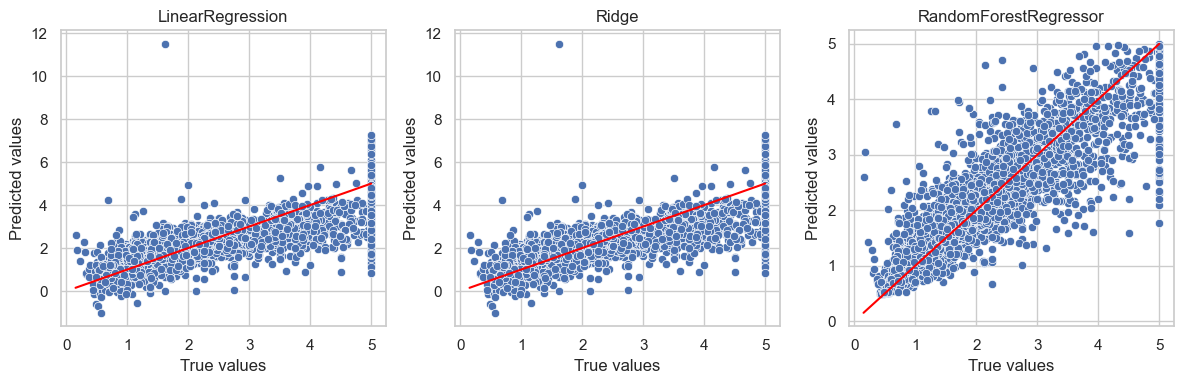

In [23]:
# 6. Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))

subplot_idx = 1
line_tuple = (y_test.min(), y_test.max())
for model_name, model in best_models.items():
    plt.subplot(1, 3, subplot_idx)
    sns.scatterplot(x=y_test, y=model.predict(X_test))
    sns.lineplot(x=line_tuple, y=line_tuple, color='red')
    plt.title(model_name)
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.grid(True)
    subplot_idx += 1

plt.tight_layout()
plt.show()
